###**Generating Synthetic Classification Dataset using make_classification**

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X , y = make_classification(n_samples=100, n_features=2,
                            n_informative=1, n_redundant=0,
                            n_classes=2, n_clusters_per_class=1,
                            random_state=41, hypercube=False,
                            class_sep=10)

This code snippet is importing necessary libraries and generating a synthetic dataset using the `make_classification` function from scikit-learn (sklearn). Let's break down each line:

```python
from sklearn.datasets import make_classification
import numpy as np
```
These lines import the `make_classification` function from the `sklearn.datasets` module and import the `numpy` library with the alias `np`. The `make_classification` function is used to generate synthetic classification datasets.

```python
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)
```
This line generates a synthetic classification dataset using the `make_classification` function. The generated dataset consists of features (X) and corresponding target labels (y).

The function parameters used in this snippet are:

- `n_samples=100`: Specifies the number of samples to generate. In this case, it generates 100 samples.

- `n_features=2`: Specifies the number of features for each sample. Here, it generates 2 features for each sample.

- `n_informative=1`: Specifies the number of informative features. Only 1 out of the 2 features contributes to the classification task.

- `n_redundant=0`: Specifies the number of redundant features. In this case, there are no redundant features.

- `n_classes=2`: Specifies the number of classes for classification. Here, it generates a binary classification problem with 2 classes.

- `n_clusters_per_class=1`: Specifies the number of clusters per class. Each class has only 1 cluster.

- `random_state=41`: Sets the random seed for reproducibility. It ensures that the generated dataset is the same each time the code is run.

- `hypercube=False`: Specifies whether the classes are generated as hypercubes. Here, it is set to `False`.

- `class_sep=10`: Controls the separation between classes. Higher values result in more distinct separation between classes.

The `make_classification` function returns the generated features `X` and corresponding labels `y`, which are assigned to the variables `X` and `y`, respectively.

In summary, this code snippet imports the necessary libraries and generates a synthetic classification dataset using the `make_classification` function, which is widely used for creating artificial datasets for classification tasks in machine learning.

In [ ]:
X.shape

In [ ]:
X.shape[1]

In [ ]:
X.shape[0]

In [ ]:
np.ones(2)

In [ ]:
y

In [ ]:
np.insert(X,0,1,axis=1)

The `np.insert()` function from the NumPy library allows you to insert values into an array along a specified axis. Let's break down the parameters of `np.insert(X, 0, 1, axis=1)`:

- `X`: The input array where the values will be inserted. It can be a 1-D or 2-D array.

- `0`: The index or indices at which the values will be inserted. In this case, `0` represents the index position where the values will be inserted along the specified axis.

- `1`: The value or values to be inserted into the array. Here, `1` represents the value `1` that will be inserted at the specified index.

- `axis=1`: The axis along which the insertion will take place. In this case, `axis=1` specifies the column axis, meaning the values will be inserted as new columns in the array.

So, in summary, `np.insert(X, 0, 1, axis=1)` inserts the value `1` as a new column at the beginning (index 0) of the array `X` along the column axis. This effectively adds a new column to the array `X`.

###**Plotting graph from the synthetic classification dataset that we generated earlier**

In [2]:
import matplotlib.pyplot as plt

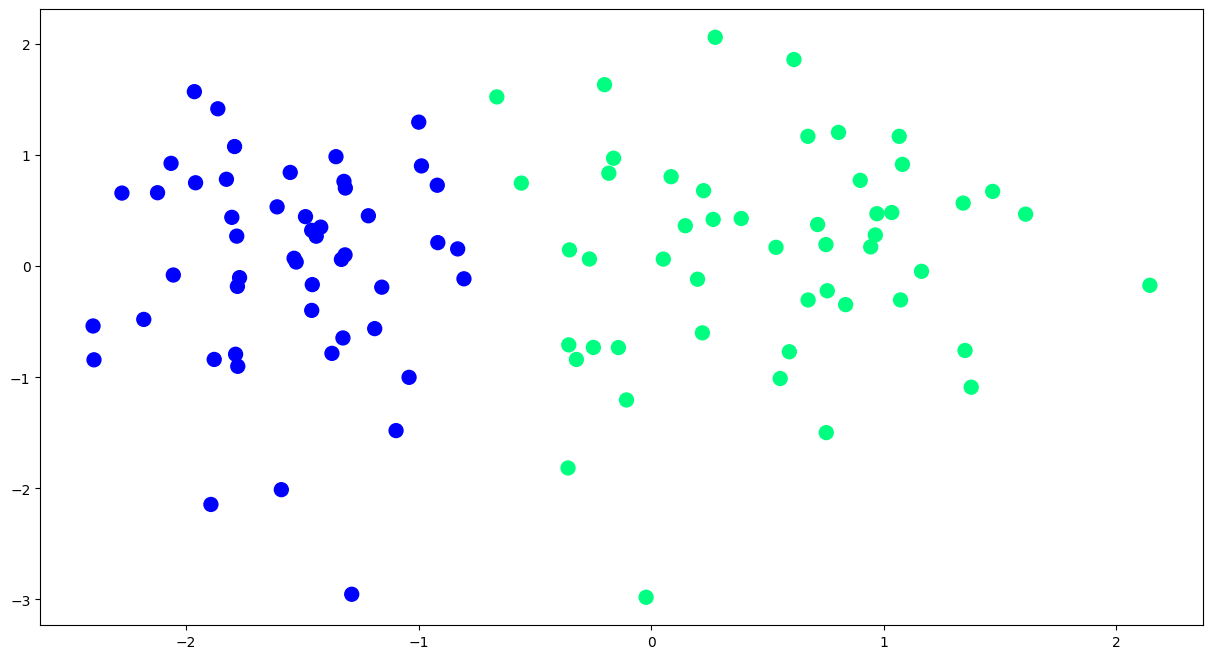

In [25]:
plt.figure(figsize=(15,8))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

This code snippet utilizes the `matplotlib.pyplot` library to create a scatter plot. Let's break down each line:

```python
plt.figure(figsize=(15, 8))
```
This line creates a new figure with a specific size. The `figsize` parameter takes a tuple of width and height in inches. In this case, the figure size is set to 15 inches in width and 8 inches in height.

```python
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
```
This line creates a scatter plot using the `scatter` function from `matplotlib.pyplot`. It takes the x-coordinates from the first column (`X[:, 0]`) of the array `X` and the y-coordinates from the second column (`X[:, 1]`) of the array `X`. The `c` parameter is set to `y`, which represents the color values for each point. The colors of the points are determined by the `y` array and are mapped to a colormap called 'winter'. The `s` parameter sets the size of the markers to 100.

In summary, this code snippet creates a figure and plots a scatter plot using the x and y coordinates from the respective columns of the array `X`. The colors of the points are determined by the `y` array and are represented using the 'winter' colormap. The resulting scatter plot visualizes the relationship between the two variables represented by the x and y coordinates, with each point color-coded based on the corresponding value in the `y` array.

###**PERCEPTRON**

In [64]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1) #adding a column at 0th index value:1 ton every row columnwise(axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):  #epoch = 1000
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]  # <== FORMULA

  return weights[0],weights[1:]

The function `perceptron(X, y)` represents a basic implementation of the perceptron learning algorithm. Let's break down the function and its steps:

1. `X = np.insert(X, 0, 1, axis=1)`: This line adds a column of ones at the beginning of the input feature matrix `X`. It inserts a column of ones to the left of the existing columns in `X`. This is done to account for the bias term in the perceptron model.

2. `weights = np.ones(X.shape[1])`: This line initializes the weights of the perceptron model. It creates an array of ones with a length equal to the number of features plus one (due to the added bias term).

3. `lr = 0.1`: This line sets the learning rate, which controls the step size of weight updates during the training process.

4. `for i in range(1000)`: This line starts a loop that iterates over a fixed number of iterations or epochs. In this case, the loop runs for 1000 iterations.

5. `j = np.random.randint(0, 100)`: This line randomly selects an index `j` from the range of 0 to 99. It is used to randomly choose a training sample for weight update.

6. `y_hat = step(np.dot(X[j], weights))`: This line computes the predicted output `y_hat` for the randomly selected training sample `X[j]`. The prediction is obtained by taking the dot product of the input sample and weights and passing it through a step function (`step()`).

7. `weights = weights + lr * (y[j] - y_hat) * X[j]`: This line updates the weights of the perceptron using the perceptron learning rule. It calculates the weight update as the product of the learning rate, the difference between the true label `y[j]` and the predicted label `y_hat`, and the input sample `X[j]`. The updated weights are then assigned to the `weights` variable.

8. The loop continues for the specified number of iterations, randomly selecting training samples and updating the weights each time.

9. `return weights[0], weights[1:]`: This line returns the updated weights. The bias weight is accessed using `weights[0]`, while the remaining weights for the input features are returned as `weights[1:]`.

In summary, the `perceptron` function implements the perceptron learning algorithm by iteratively updating the weights based on randomly selected training samples. The function learns to classify data by adjusting the weights to minimize prediction errors. The final weights are returned as the result of the function.

In [11]:
def step(z):
  return 1 if z>0 else 0

In [ ]:
# np.ones(3)

In [ ]:
# np.random.randint(0,100)

In [ ]:
# X[10]

In [ ]:
# np.insert(X[10],0,1)

In [ ]:
# value = np.dot(np.insert(X[10],0,1), [1,1,1])
# value

In [ ]:
# step(value)

In [13]:
intercept_, coeff_ = perceptron(X,y)

In [14]:
print(coeff_)
print(intercept_)

[1.44223851 0.16857268]
0.9


In [15]:
m = -(coeff_[0]/coeff_[1])
b = -(intercept_/coeff_[1])

In [16]:
print(m,b)

-8.55558853976305 -5.338943321202979


###**Generating the line through which we can equally segregate our dataset into 2 categories**

In [72]:
x_COORDINATE = np.linspace(-3,3,100) # x-coordinates of our required line
y_COORDINATE = m*x_COORDINATE + b # calculating y-coordinate of our required line

This code snippet is creating input data for a linear equation with a given slope and intercept. Let's break down each line:

```python
x_COORDINATE = np.linspace(-3, 3, 100)
```
This line generates an array of 100 evenly spaced values between -3 and 3 using the `np.linspace()` function from NumPy. The generated values are stored in the variable `x_COORDINATE`. These values represent the x-coordinates or input values for the linear equation.

```python
y_input = m * x_COORDINATE + b
```
This line calculates the corresponding y-coordinates or output values for the linear equation. The equation `y = mx + b` represents a line where `m` is the slope (the rate of change of y with respect to x) and `b` is the y-intercept (the value of y when x is 0).

By multiplying `m` with `x_COORDINATE` and adding `b`, the equation calculates the y-coordinates for each corresponding x-coordinate in `x_COORDINATE`. The resulting values are stored in the variable `y_COORDINATE`.

In summary, this code generates input values (`x_COORDINATE`) within the range of -3 to 3 and calculates corresponding output values (`y_COORDINATE`) based on a linear equation with slope `m` and y-intercept `b`. The resulting `x_COORDINATE` and `y_COORDINATE` arrays can be used for plotting the linear relationship between x and y.

In [ ]:
x_COORDINATE

In [ ]:
y_COORDINATE

###**RESULT**

(-3.0, 2.0)

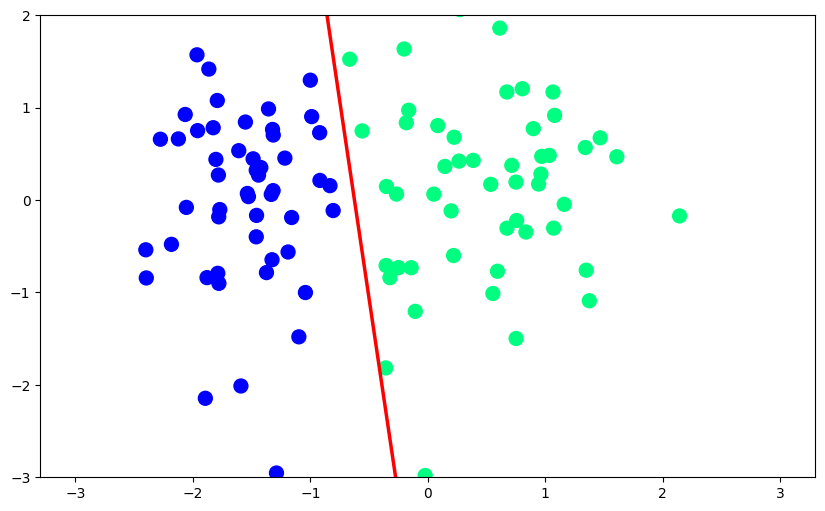

In [76]:
plt.figure(figsize=(10,6))
plt.plot(x_COORDINATE,y_COORDINATE,color='red',linewidth=2.5)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

This code snippet utilizes the `matplotlib.pyplot` library to create a plot with multiple elements. Let's break down each line:

```python
plt.figure(figsize=(10, 6))
```
This line creates a new figure with a specific size. The `figsize` parameter takes a tuple of width and height in inches. In this case, the figure size is set to 10 inches in width and 6 inches in height.

```python
plt.plot(x_COORDINATE, y_COORDINATE, color='red', linewidth=2.5)
```
This line plots a line graph using the `plot` function from `matplotlib.pyplot`. It takes the `x_COORDINATE` array as the x-coordinates and the `y_COORDINATE` array as the y-coordinates. The line is plotted with a red color specified by `color='red'`. The `linewidth=2.5` parameter sets the thickness of the line to 2.5.

```python
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
```
This line creates a scatter plot using the `scatter` function from `matplotlib.pyplot`. It takes the x-coordinates from the first column (`X[:,0]`) of the array `X` and the y-coordinates from the second column (`X[:,1]`) of the array `X`. The `c` parameter is set to `y`, which represents the color values for each point. The colors of the points are determined by the `y` array and are mapped to a colormap called 'winter'. The `s` parameter sets the size of the markers to 100.

```python
plt.ylim(-3, 2)
```
This line sets the limits of the y-axis on the plot. The `ylim` function is used to define the minimum and maximum values of the y-axis. In this case, the y-axis is set from -3 to 2.



---

**In summary, this code snippet creates a figure, plots a line graph, adds scatter plot markers, and sets the y-axis limits, while customizing the color, linewidth, and marker size of the plotted elements. The resulting plot visualizes the line graph and scatter plot with specific style and formatting.**